## Importing Libraries and Dataset

In [1]:
import os
import cv2
import numpy as np
from imutils import paths

In [2]:
from sklearn.preprocessing import LabelBinarizer

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
datapath = r"C:\Users\siddh\OneDrive\Desktop\Major Project\Keras\data"
outputmodel = r"C:\Users\siddh\OneDrive\Desktop\Major Project\Keras\model\outputmodel"
outputlabelbinarizer = r"C:\Users\siddh\OneDrive\Desktop\Major Project\Keras\model\outputmodelbinarizer"
epoch = 5

## Data Pre-processing

In [6]:
Sports_Labels = set(['NATURAL', 'GAMING','ANIMATION'])
print('Images is being loaded...')
pathToImages = list(paths.list_images(datapath))
data = []
labels = []

for images in pathToImages:
    label = images.split(os.path.sep)[-2]
    if label not in Sports_Labels:
        continue
    image = cv2.imread(images)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (244,244))
    data.append(image)
    labels.append(label)

Images is being loaded...


In [7]:
data = np.array(data)
labels = np.array(labels)
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [8]:
(X_train, X_test, Y_train, Y_test) = train_test_split(data, labels, test_size = 0.25, stratify = labels, random_state = 42)

In [11]:
traininAugmentation = ImageDataGenerator(
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,horizontal_flip=True,fill_mode="nearest")

validationAugmentation = ImageDataGenerator()
mean = np.array([123.68, 116.779, 103.939], dtype = "float32")
traininAugmentation.mean = mean
validationAugmentation.mean = mean

## Model Creation

In [12]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers
from tensorflow.keras.layers import Input
from keras.layers.pooling import AveragePooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

from tensorflow.keras.layers import Dropout
from tensorflow.keras import Model

In [13]:
baseModel = ResNet50(weights="imagenet", include_top= False, input_shape=(224,244,3))

headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7,7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(512, activation = "relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(len(lb.classes_), activation="softmax")(headModel)
model = Model(inputs=baseModel.input, outputs=headModel)

for basemodelLayers in baseModel.layers:
    basemodelLayers.trainable = False
#headModel.summary()

In [22]:
from tensorflow.keras.optimizers import Adam

In [23]:
opt = Adam(learning_rate = 0.0001)

In [24]:
model.compile(loss = "categorical_crossentropy",optimizer = opt, metrics = ["accuracy"])

In [25]:
History = model.fit(
    traininAugmentation.flow(X_train,Y_train,batch_size=32),
    steps_per_epoch=len(X_train) // 32,
    validation_data=validationAugmentation.flow(X_test,Y_test),
    validation_steps = len(X_test) // 32,
    epochs = epoch)

Epoch 1/5
47/47 [==============================] - 181s 4s/step - loss: 5.8409 - accuracy: 0.8389 - val_loss: 0.2507 - val_accuracy: 0.9771
Epoch 2/5
47/47 [==============================] - 185s 4s/step - loss: 0.2440 - accuracy: 0.9601 - val_loss: 0.0860 - val_accuracy: 0.9792
Epoch 3/5
47/47 [==============================] - 173s 4s/step - loss: 0.0584 - accuracy: 0.9810 - val_loss: 0.1126 - val_accuracy: 0.9729
Epoch 4/5
47/47 [==============================] - 180s 4s/step - loss: 0.0918 - accuracy: 0.9743 - val_loss: 0.0692 - val_accuracy: 0.9771
Epoch 5/5
47/47 [==============================] - 174s 4s/step - loss: 0.0473 - accuracy: 0.9824 - val_loss: 0.0686 - val_accuracy: 0.9792


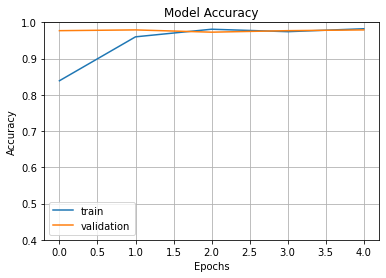

In [26]:
import matplotlib.pyplot as plt
fig1 = plt.gcf()
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [20]:
import pickle

In [21]:
model.save(outputmodel)
lbinarizer = open(r"C:\Users\siddh\OneDrive\Desktop\Major Project\Keras\model\outputmodelbinarizer.pickle","wb")
lbinarizer.write(pickle.dumps(lb))
lbinarizer.close()

D:\Anaconda3\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: C:\Users\siddh\OneDrive\Desktop\Major Project\Keras\model\outputmodel\assets
